# Exercise 1 : Window Functions - Solution

<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs)</strong><br>
    
After completing this Jupyter Notebook you should be able to:
    
<ul>
<li>create and visualise window functions in time-domain and frequency-domain using discrete Fourier transform (DFT)
</li>
    <br>
    
<li>identify the normalised frequency response depending on the specific windowing technique 
</li>
    <br>
    
<li>gain a better understanding of the differences among spectral representations of window functions
</li>
    <br>
    
<li>demonstrate the effects of different values of the parameters of the Kaiser window
</li>
        <br>
 <li>understand basic use of functions from the <code>Python</code> libraries
<ul>
<li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like
<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html"><code>title()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>xlabel()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html"><code>ylabel()</code></a>,
etc.)
</li>
<li><a href="https://numpy.org/"><code>Numpy</code></a> for mathematical functions and calculations like
<a href="https://numpy.org/doc/stable/reference/generated/numpy.log10.html"><code>log10()</code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><code>linspace()</code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html"><code>abs()</code></a>, etc.
</li>
<li>Mostly used library for signal processing
<a href="https://docs.scipy.org/doc/scipy/reference/signal.html"><code>SciPy</code></a>
</li>
</ul>
</li>

</ul>
</div>

In this notebook, <code>rectangular</code>,<code>hann</code>,<code>hamming</code>,<code>blackman</code> ,<code>bartlett</code> and 
<code>kaiser</code> windows and their fourier transforms will be explained. We'll be theoretically using the discrete-time Fourier transform (DTFT) to obtain the frequency domain representation but the FFT will be practically used to calculate the Fourier Transform in this exercise since it is an efficient implementation. 

A signal can be analysed in time-domain and frequency-domain. The time-domain representation is analysed as a discrete (sampled) system described by its finite impulse response (FIR) systems. Time and frequency domain are two different ways of representing signals.

<div class="alert alert-block alert-info">
Both domains can be transformed into each other. In this notebook, window functions are initally shown the in a time-domain and then transformed into the frequency domain.  
    <br>
<ul>
<li>In the Fourier Transform (FT), continuous time-domain of the signals is transformed into continuous frequency-domain.
</li>
    <br>
<li>However, Discrete-Time Fourier Transform (DTFT) algorithm is used in order to transform the discrete (sampled) time-domain of the signals into the continuous frequency-domain.
</li>
    <br>    
<li>Generally, Fast Fourier Transform (FFT) algorithm is used in exercises since the calculations are fastly and efficiently made. In this exercise, we'll use FFT library of SciPy.
</li>
    <br>
</ul>  
</div>




#### Discrete-Time Fourier Transform (DTFT)
The DTFT is one type of the transforms which implements the Fourier transform for discrete time signals $t[k]$ but results in a continuous spectrum denoted by $X\left(e^{j\Omega}\right)$ . In order to understand the DTFT better, it's necessary to understand the connection between DFT and DTFT first. 

Assume that there is a signal with $k$ samples. The DFT says that a signal function can be decomposed into cosine and sine functions where frequencies are equidistantly distributed between $ 0 $ and $ 1/2 $ of the sample rate $f_s$. If time-domain is padded (filled) with zeros, samples increase and time-domain signal period gets longer. By that, the frequency-domain representation gets more densely sampled. If $ k $ $\rightarrow$ $\infty$, the frequency domain representation will be continuous. That is a description of the discrete-time Fourier transform (DTFT). The discrete-time Fourier transform (DTFT) and the inverse discrete-time Fourier Transform (IDTFT) are defined as:

\begin{eqnarray}\label{DTFT2} \tag{1.1}
\hbox{DTFT}\left\{x[k]\right\} &=& X\left(e^{j\Omega }\right) = \sum ^\infty _{k=-\infty } x[k]\, e^{-j\Omega k} \\
\label{IDTFT}\tag{1.2}
\hbox{IDTFT}\left\{X\left(e^{j\Omega}\right)\right\} &=& x[k] = {\frac{1}{2\pi}} \int\limits
^{\pi }_{-\pi } X\left(e^{j\Omega }\right)\, e^{j\Omega k} d\Omega \,
\end{eqnarray}




#### Discrete Fourier Transform (DFT)

The DFT is another type of the transforms typically used in order to obtain frequency-domain. The logic behind it is same with the DTFT. They give nearly same results. The only difference between them is the speed of the computing. FFT is efficiently computed for calculations to show the results of DFT. It's used in many applications e.g. spectral analysis, filterbanks.

The formula below is used for the same purpose with DFT :

\begin{align} 
f[k] &= \sum_{n=0}^{N-1} x[n]\left(e^{-2\pi i k/N}\right)^n   \tag{1.3} 
\ \ \ \mathrm{for} \  \ 0 \leq k < N   
\end{align}






## Python Libraries used in this exercise 
At the beginning, it's required to import relevant libraries into the code part.

### Scipy

 SciPy is mostly used library for signal processing since it has wide range of functions and implementations. That's why we initially <code>import scipy.signal as sig</code>. There are only six functions of <code>scipy.signal</code> to be used in this exercise:
<ol>
    <li><code>sig.windows.boxcar(order)</code>: This function creates a <code>rectangular</code> window a.k.a <code>boxcar</code> window. The output of the function is the normalised to $1$ in amplitude. Therefore, you will notice that amplitude graph of the window is $1$ at maximum. The parameter $order$ needs to be in the integer type. It will be used as <code>boxcar_w1 = sig.windows.boxcar(order)</code> in the task below. </li>
    <li><code>sig.windows.hann(order)</code>: This function creates a <code>hann</code> window. The output of the function is the normalised to $1$ in amplitude. Therefore, you will notice that amplitude graph of the window is $1$ at maximum. The parameter $order$ needs to be in the integer type. The function will be used as <code>hann_w1 = sig.windows.hann(order)</code> in the task below. </li>
    <li><code>sig.windows.hamming(order)</code>: This function creates a <code>hamming</code> window. The output of the function is the normalised to $1$ in amplitude. Therefore, you will notice that amplitude graph of the <code>hamming</code> window is $1$ at maximum. The parameter $order$ needs to be in the integer type. The function will be used as <code>hamming_w1 = sig.windows.hamming(order)</code> in the task below. </li>
    <li><code>sig.windows.blackman(order)</code>: This function creates a <code>blackman</code> window. The output of the function is the normalised to $1$ in amplitude. Therefore, you will notice that amplitude graph of the window is $1$ at maximum. The parameter $order$ needs to be in the integer type. The function will be used as <code>blackman_w1 = sig.windows.blackman(order)</code> in the task below. </li>
    <li><code>sig.windows.bartlett(order)</code>: This function creates a <code>bartlett</code> window. The output of the function is the normalised to $1$ in amplitude. Therefore, you will notice that amplitude graph of the window is $1$ at maximum. The parameter $order$ needs to be in the integer type. The function will be used as <code>window = sig.windows.bartlett(order)</code> in the task below. </li>
    <li><code>sig.windows.kaiser(order, beta)</code>: This function creates a <code>kaiser</code> window. The output of the function is the normalised to $1$ in amplitude. Therefore, you will notice that amplitude graph of the window is $1$ at maximum. The parameter $order$ needs to be in the integer type. The parameter $beta$ is in the float type. The function will be used as <code>kaiser_w1 = sig.windows.kaiser(order, beta)</code> in the exercise. The value of the beta will be $0$, $3$, and $6$ in the task below. </li>
</ol>

When it comes to FFT library, it is necessary to import the libraries of <code>fft</code>, <code>fftshift</code>, and <code>ifft</code> from <code>scipy.fft</code>. Let's define each one.
<ol>
    <li><code>fft</code>: This function calculates the 1-D discrete fourier transform.</li>
    <li><code>fftshift</code>: This function shifts the frequency of $0$ Hz to the centre</li>
    <li><code>ifft</code>: This function calculates the 1-D inverse discrete fourier transform.</li>
</ol>

### Matplotlib.pyplot

Matplotlib is a powerful library to visualise intermadiate results of our codes. It enables us to make lots of changes on the figures. It's going to be used <code>as plt</code>. In this exercise, mostly used attributes of the plt library are <code>plt.figure()</code>, <code>plt.subplot()</code>, <code>plt.plot()</code>, <code>plt.title('')</code>, <code>plt.xlabel('')</code>, <code>plt.ylabel('')</code>, <code>plt.axis()</code>, <code>plt.stem()</code>, <code>plt.legend()</code> and <code>plt.grid()</code>

<ol>
    <li><code>plt.figure()</code>: This function creates a figure, optionally with defining a size with the parameter <code>figsize = (x,y)</code>. In this exercise, the size of the figure is set to ($x = 15$, $y = 4$) which means $15\ x \ 4$ inches</li>
    <li><code>plt.subplot()</code>: This function divides the size we set in figsize into several parts. If we divide x-axis into two parts, for first graph it is shown as: <code>plt.subplot(1,2,1)</code>, for second graph it is shown as: <code>plt.subplot(1,2,2)</code>. So that, we can show two graphs fitted to the figsize. 
    <li><code>plt.plot()</code>: The values to be plotted are specified inside the function. For example;<code>plt.plot(freq, response, 'b' , label="m=42")</code>. Here, There are four parameters that are $freq, response, colour$ , and $label$. As you'll see the the values of the parameters below, the frequency response of the window is plotted in normalised magnitude $dB$.</li>
    <li><code>plt.title('')</code>: As a string type, Title, is determined and written at the top the graph. For example; <code>plt.title('Frequency response of the boxcar window')</code></li>
    <li><code>plt.xlabel('')</code>: This function puts a label into the x-axis. For example; <code>plt.xlabel("Discrete time index $k$")</code></li>
    <li><code>plt.ylabel('')</code>: This function puts a label into the y-axis. For example; <code>plt.ylabel("Amplitude")</code></li>
    <li><code>plt.axis()</code>: This function provides us to set the limit of the $x$ and $y$ axis all together. For example; <code>plt.axis([-1.0, 1.0, -80, 0])</code>. Here, the $x$-axis ranges from $-1$ to $1$ while the $y$ axis ranges from $-80$ to $0$.</li>
    <li><code>plt.grid()</code>: This function plots the auxiliary lines in a grid form. It has few parameters but we'll not use them at the moment. </li>
    <li><code>plt.stem()</code>: This function plots the lines in a stem form which is common to visualise discrete signals. It has few parameters and we'll use only <strong>window</strong> that we used above in the <code>window = sig.windows.''(Lw)</code> and <strong>use_line_collection = True</strong>. Unless it is put <strong>True</strong>, vertical lines will not appear. </li>
    <li><code>plt.legend()</code>: This function shows elements of the figure. For example, it is desired to show more than one signal in the same figure. The function <code>plt.legend()</code>, which shows what these signals belong to, can also set the location of the elements such as <code>plt.legend(loc='lower right')</code>. If the location is not specified, the location is set into 'upper right' as default. In this exercise, the location is not specified exactly so all of them is located in the upper right. </li>
</ol>

### Numpy

Numpy is the last library that needs to be used in this exercise. It's going to be imported <code>as np</code>. Then, we'll use it now for math and calculations. In this exercise, some implementations of it is:

<ol>
    <li><code>np.abs()</code>: The absolute value is computed in this function. It's the short form of the <code>np.absolute()</code></li>
    <li><code>np.linspace()</code>: In this exercise, it will be in the form of <code>np.linspace(-1.0, 1.0, len(A))</code>. It means that from the starting point of $-1.0$ to the end point of $1.0$ and for <code>len(A)</code> being the interval between $-1$ and $1$ will be evenly divided by length of $A$.</li>
    <li><code>np.log10()</code>: This function returns base $10$ logarithm. </li>
    
</ol>

This exercise contains one task and two subtasks. These explain two main concepts:
<ol>
    <li> time-domain of the window functions and </li>
    <li> their fourier transforms </li>
</ol>

Time to jump into questions.

<div class="alert alert-block alert-info">
    <strong><h3> Task 1.a </h3></strong> <br>
    Visualise (Plot) the  <code>rectangular</code>,<code>hann</code>,<code>hamming</code>,<code>blackman</code> and <code>bartlett</code> windows for an order of $m=42$ and their fourier transforms for both orders $m=21$ and $m=42$ 
</div>


In [1]:
#necessary libraries are added

import scipy.signal as sig                    #signal processing library
from scipy.fft import fft, fftshift, ifft     #fast fourier transform library
import numpy as np                            #numpy for math 
import matplotlib.pyplot as plt               #plotting

In [2]:
order = 42             #coefficient m (filter order)            
#Lw = order + 1        #(m + 1)th order

#### Rectangular Window a.k.a boxcar window in time and frequency domain

\begin{equation} \tag{1.4} 
\label{eq:GL5_3_29} 
w^\mathrm{Rec}[k]=\left\{ \begin{array}{ll}
1& \hbox{for}\ 0\leq k \leq m\\
0&\mbox{else}
\end{array}
\right.
\end{equation}

As you see from the equation ([1.4](#mjx-eqn-GL5_3_29)) above, there are boundaries for the discrete time index $k$ which are the filter order $m$ and $0$ as lower limit. For all indices $k$ between them the amplitude is equal to $ 1 $, otherwise $ 0 $.



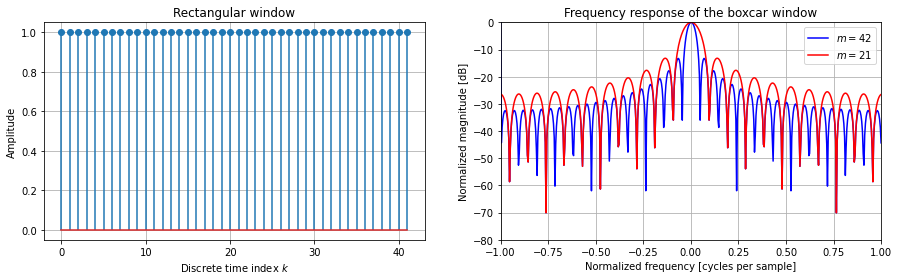

In [3]:
#Create the window
boxcar_w1 = sig.windows.boxcar(order)                   #define the rectangular window for order m = 42

#Visualise the window
plt.figure(figsize=(15,4))                              #set the size of the figure

#Time-domain graph of boxcar window for m = 42
plt.subplot(1,2,1)                                      #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(boxcar_w1, use_line_collection=True)           #plot discrete (sampled) time-domain graph for order m = 42
plt.ylabel("Amplitude")                                 #put name of y label
plt.xlabel("Discrete time index $k$")                   #put name of x label
plt.title("Rectangular window")                         #put title of the figure
plt.grid()                                              #configure the grid lines

#Frequency response of boxcar window for m = 42
plt.subplot(1,2,2)                               #2nd plot of the 2 plots. (It's gonna be visualised on the right)
A = fft(boxcar_w1, 512) / (len(boxcar_w1)/2.0)   #FFT of the time-domain 
freq = np.linspace(-1.0, 1.0, len(A))            #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))               #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0 ) #magnitude is calculated 
plt.plot(freq, response, 'b' , label="$m=42$")         #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                        #set x and y axis  

plt.ylabel("Normalized magnitude [dB]")                 #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")  #put name of x label
plt.title("Frequency response of the boxcar window")    #put title of the figure

#Frequency response of boxcar window for m = 21
boxcar_w2 = sig.windows.boxcar(21)                 #define the rectangular window for order m = 21
A = fft(boxcar_w2, 512) / (len(boxcar_w2)/2.0)     #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))              #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))             #shift the zero-frequency component to the center of the spectrum 
response = 20 * np.log10(x, out = x, where = x > 0 ) #magnitude is calculated 
plt.plot(freq, response, 'red', label="$m=21$")        #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                        #set x and y axis 

plt.grid()   #configure the grid lines
plt.legend() #describe elements of the graph



Since ([1.4](#mjx-eqn-GL5_3_29)) states that for $k$ between $0$ and the filter order $m$, $w^\mathrm{Rec}[k]$ is equal to $1$. All values at the discrete index $k$ are equal to $1$ including beginning and end points as you can see from the figure on the left. The figure on the right depicts the frequency response of <code>boxcar</code> window for orders $m = 42$ and $m = 21$. It was computed using the fast Fourier transform (FFT). Computed values are stored in the variable <code>A</code> in the code above. Therefore, <code>A</code> consists of complex numbers. You can try writing <code>A</code> at the end of the code in order to see whole array of the complex numbers. Then, the complex values stored in the variable <code>A</code> are shifted by function <code>fftshift</code> and the absolute value $|A|$ is taken with <code>np.abs</code>. Thus, the variable <code>x</code> consists of absolute values. 

In addition, frequencies for the filter of orders $m = 21$ and $m = 42$ are normalised. Normalised frequency is expressed in the units of cycles per sample and usually denoted by $\Omega$. On the other hand, the normalised magnitude is computed in $dB$. The pseudo-unit decibel is a logarithmic expression. As it can be seen from the code part, the variable <code>response</code> is equal to the magnitude and contains logarithmic expression.



#### Hann Window in Time and Frequency Domain

The <code>Hann</code> window is effective in terms of preventing discontinuities in the signal. It's frequently used in signal processing algorithms and defined as:

\begin{equation} \label{eq:GL5_3_34} \tag{1.5} %Hann window 
w^\mathrm{Hn}[k]= \left \{
\begin{array}{ll}
\frac{1}{2} \left(1-\cos \frac{2\pi}{m} k \right) & \hbox{for}\  0 \leq k \leq  m \\
 0  & \hbox{else.}
\end{array}
\right.
\end{equation}

The following code generates and visualises the <code>Hann</code> window. 

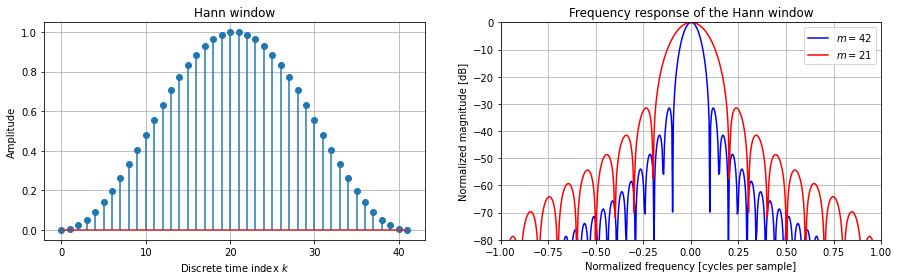

In [4]:
#Create the window
hann_w1 = sig.windows.hann(order)                     #define the Hann window for order m = 42

#Visualise the window
plt.figure(figsize=(15,4))                            #set the size of the figure

#Time-domain graph of Hann window for m = 42
plt.subplot(1,2,1)                                    #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(hann_w1, use_line_collection=True)           #plot discrete (sampled) time-domain graph for order m = 42
plt.ylabel("Amplitude")                               #put name of y label
plt.xlabel("Discrete time index $k$")                 #put name of x label
plt.title("Hann window")                              #put title of the figure
plt.grid()                                            #configure the grid lines

#Frequency response of Hann window for m = 42
plt.subplot(1,2,2)                                    #2nd plot of the 2 plots. (It's gonna be visualised on the right)
A = fft(hann_w1, 512) / (len(hann_w1)/2.0)            #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                 #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                #shift the zero-frequency component to the center of the spectrum  
response = 20 * np.log10(x, out = x, where = x > 0 )  #magnitude is calculated.(Zero collision error is avoided) 
plt.plot(freq, response, 'b', label="$m=42$")         #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                         #set x and y axis 

plt.ylabel("Normalized magnitude [dB]")               #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")#put name of x label
plt.title("Frequency response of the Hann window")    #put title of the figure

#Frequency response of Hann window for m = 21
hann_w2 = sig.windows.hann(21)                        #define the Hann window for order m = 21
A = fft(hann_w2, 512) / (len(hann_w2)/2.0)            #compute FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                 #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(np.maximum(x, 1e-10))        #magnitude is calculated (Zero collision error is avoided)
plt.plot(freq, response, 'red', label="$m=21$")         #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                         #set x and y axis

plt.grid()                                            #configure the grid lines
plt.legend();                                         #describe elements of the graph
                                                      #; suppresses last output


The created <code>'Hann'</code> window is one of the most common window functions. The <code>'Hann'</code> window is popular among other window functions.  According to the ([1.5](#mjx-eqn-eq:GL5_3_34)) if the discrete values of $k$ are between $0$ and the filter order $m$, the result is a function that contains a raised cosine. For discrete time indices $k$ which are not in the interval defined in the function ([1.5](#mjx-eqn-eq:GL5_3_34)), the output is equal to $0$. It means that no window will appear in time-domain. 

As you can see from the time-domain visualisation of the <code>Hann</code> window, there is a symmetry. The values from $k = 0$ to $k = 20$ equal to those from $k = 21$ to $k = 41$. It means that linear phase is ensured. The same condition is satisfied by the <code>rectangular (boxcar)</code> window as well. When compared to <code>boxcar</code> window in terms of the frequency response, the attenuation of the first side lobe (2nd highest 'lobe') at the frequency approx. $\Omega = 0.25$ in the right figure above) of the <code>Hann</code> window is larger.

You can add <code>hann_w1</code> at the end of the code above to print the values. The amplitude at discrete time index $k$ for $m = 42$ can be seen in this way. 

| **$k$** 	| **Symmetric $k$** |  **Result** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[41]$           | $0$          	|
| $k[1]$   	| $k[40]$           | $0.006$      	|
| $k[2]$   	| $k[39]$           | $0.023$      	|
| $k[3]$   	| $k[38]$           | $0.005$       |
| $\vdots$  | $\vdots$          | $\vdots$     	|
| $k[20]$  	| $k[21]$           | $0.998$      	|


If you add <code>hann_w2</code> at the end of the code part to print its values, the amplitude at discrete time index $k$ for $m = 21$ can be seen in the array form. Its values are:


| **$k$** 	| **Symmetric $k$** 	|  **Result** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[20]$           	| $0$          	|
| $k[1]$   	| $k[19]$           	| $0.024$      	    |
| $k[2]$   	| $k[18]$           	| $0.095$      	    |
| $k[3]$   	| $k[17]$           	| $0.206$       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[10]$  	|   $-$         	    | $1$      	    |

The two tables above illustrate the symmetry property of the <code>hann</code> windows.


#### Hamming Window in Time and Frequency Domain

The <code>Hamming</code> window is another popular windowing technique along with <code>Hann</code> window. It's typically used in the MFCC algorithm which is used for front-end applications in speech technology. It is defined as:


\begin{equation}\label{GL5_3_39} \tag{1.6}  %Hamming window 
w^\mathrm{Hm}[k] =  \left[0,54 - 0,46 \cos \left(\frac{2\pi}{m}k \right)\right]\cdot w^\mathrm{R}[k] \,
\end{equation}



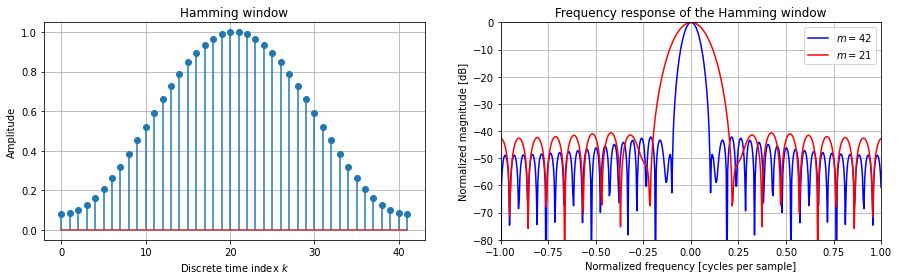

In [5]:
#Create the window
hamming_w1 = sig.windows.hamming(order)               #define the Hamming window for order m = 42

#Visualise the window
plt.figure(figsize=(15,4))                            #set the size of the figure
 
#Time-domain graph of Hamming window for m = 42
plt.subplot(1,2,1)                                    #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(hamming_w1, use_line_collection=True)        #plot discrete (sampled) time-domain graph for order m = 42
plt.ylabel("Amplitude")                               #put name of y label
plt.xlabel("Discrete time index $k$")                 #put name of x label
plt.title("Hamming window")                           #put title of the figure
plt.grid()                                            #configure the grid lines

#Frequency response of Hamming window for m = 42
plt.subplot(1,2,2)                                    #2nd plot of the 2 plots. (It's gonna be visualised on the right)
A = fft(hamming_w1, 512) / (len(hamming_w1)/2.0)      #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                 #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                #shift the zero-frequency component to the center of the spectrum 
response = 20 * np.log10(x, out = x, where = x > 0)   #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'b', label="$m=42$")           #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                         #set x and y axis

plt.ylabel("Normalized magnitude [dB]")               #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")#put name of x label
plt.title("Frequency response of the Hamming window") #put title of the figure

#Frequency response of Hamming window for m = 21
hamming_w2 = sig.windows.hamming(21)                  #define the Hamming window for order m = 21
A = fft(hamming_w2, 512) / (len(hamming_w2)/2.0)      #compute FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                 #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0)   #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'red', label="$m=21$")         #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                         #set x and y axis   

plt.grid()                                            #configure the grid lines
plt.legend()                                          #describe elements of the graph


The ends of the <code>Hamming</code> window, which is similarly used like <code>Hann</code> window, do not touch zero. ([1.6](#mjx-eqn-eq:GL5_3_39)) defines the <code>hamming</code> window function. The difference from <code>Hann</code> window is the coefficients $a$ and $b$. While <code>Hann</code> window has $a = 0.5$ and $b = 0.5$, <code>Hamming</code> window has $a = 0.54$ and $b = 0.46$. It is also referred to as an apodization function which means also tapering function. It also has symmetry property like <code>Hann</code> window. When looked at the amplitude at the discrete time index $k$, it can be seen that $[0:20] = [21:41]$. The figure on right shows the fourier transform of the <code>Hamming</code> window. The first side lobe is approximately $42$ $dB$ down from main side lobe for $m = 42$.

You can add <code>hamming_w1</code> at the end of the code part. The amplitude at discrete time index $k$ for $m = 42$ can be seen in this way. 

| **$k$** 	| **Symmetric $k$** 	|  **Result** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[41]$           	| $0.080$         |
| $k[1]$   	| $k[40]$           	| $0.085$     	|
| $k[2]$   	| $k[39]$           	| $0.101$      	|
| $k[3]$   	| $k[38]$           	| $0.128$       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[20]$  	| $k[21]$           	| $0.999$      	|


If you add <code>hamming_w2</code> at the end of the code part, the amplitude at discrete time index $k$ for $m = 21$ can be seen in the array form. Its values are:


| **$k$** 	| **Symmetric $k$** 	|  **Result** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[20]$           	| $0.08$          	|
| $k[1]$   	| $k[19]$           	| $0.102$      	    |
| $k[2]$   	| $k[18]$           	| $0.168$      	    |
| $k[3]$   	| $k[17]$           	| $0.270$       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[10]$  	|   $-$         	    | $1$      	    |

The two tables above illustrate the window symmetry.


#### The Blackman Window in Time and Frequency Domain

The <code>Blackman</code> window function is defined as follows:

\begin{equation}\label{blackman} \tag{1.7} %Blackman window
w^\mathrm{Bl}[k] = \left[0,42 - 0,5 \cos \frac{2\pi}{m} k + 0,08 \cos \frac{4\pi}{m} k \right]\cdot w^\mathrm{R}[k]
\end{equation}


As you can see from the equation ([1.7](#mjx-eqn-blackman)) that there is additional cosine term compared to other window functions. So, let's analyse the window properties graphically. 

First, let's start with coding window.

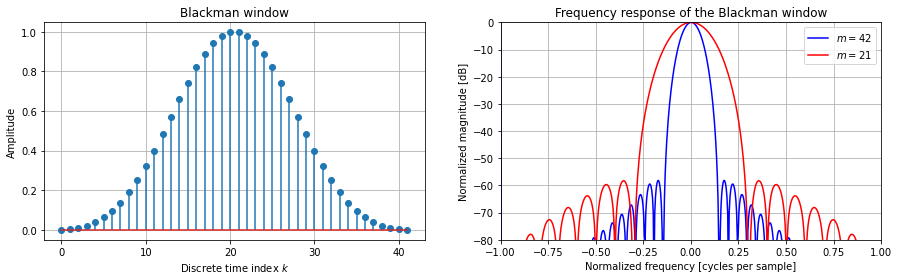

In [6]:
#Create the window
blackman_w1 = sig.windows.blackman(order)             #define the Blackman window for order m = 42

#Visualise the window
plt.figure(figsize=(15,4))                            #set the size of the figure

#Time-domain graph of Blackman window for m = 42
plt.subplot(1,2,1)                                    #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(blackman_w1, use_line_collection=True)       #plot discrete (sampled) time-domain graph for order m = 42
plt.ylabel("Amplitude")                               #put name of y label
plt.xlabel("Discrete time index $k$")                 #put name of x label
plt.title("Blackman window")                          #put title of the figure
plt.grid()                                            #configure the grid lines

#Frequency response of Blackman window for m = 42
plt.subplot(1,2,2)                                    #2nd plot of the 2 plots. (It's gonna be visualised on the right)
A = fft(blackman_w1, 512) / (len(blackman_w1)/2.0)    #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                 #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0)   #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'b', label="$m=42$")           #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                         #set x and y axis

plt.ylabel("Normalized magnitude [dB]")               #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")#put name of x label
plt.title("Frequency response of the Blackman window")#put title of the figure
 
#Frequency response of Blackman window for m = 21
blackman_w2 = sig.windows.blackman(21)                #define the Blackman window for order m = 21
A = fft(blackman_w2, 512) / (len(blackman_w2)/2.0)    #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                 #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(np.maximum(x, 1e-10))        #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'red', label="$m=21$")         #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                         #set x and y axis
 
plt.grid()                                            #configure the grid lines
plt.legend()                                          #describe elements of the graph



The figure on the left depicts time-domain <code>Blackman</code> window. According to the ([1.7](#mjx-eqn-blackman)) there are three coefficients that are $a$, $b$, and $c$ in the <code>blackman</code> window. These are $0.42$, $0.5$ and $0.08$ respectively. Also, there is an additional cosine in the definition of the window function. It leads the function curve to bend more as you see time-amplitude graph. The figure on the right visualises frequency response of the <code>Blackman</code> window function. One of the differences compared to the <code>Hamming</code> window is the attenuation of the first side lobe. It can be seen by changing the range of the y-axis to show smaller values down to the $-150$ $dB$ in the code part. Approximately $57$ $dB$ attenuation is reached which is greater than <code>Hamming</code> window. 

If you separately add <code>blackman_w1</code> and <code>blackman_w2</code> at the end of the code part, you will see the array type at the amplitude for $m = 42$ and $m = 21$. The results for <code>blackman_w1</code>:

| **$k$** | **Symmetric $k$**|  **Scientific notation**| **Result** |
|:---------:|:--------------: |:-------------------:   |:----------:  |
| $k[0]$   	| $k[41]$     | -1.38777878e-17       | $0$          	|
| $k[1]$   	| $k[40]$      | 2.13149947e-03       | $0.002$      	|
| $k[2]$   	| $k[39]$     | 8.73615283e-03        | $0.009$      	|
| $k[3]$   	| $k[38]$       | 2.04152544e-02       | $0.020$     |
| $\vdots$  | $\vdots$       | $\vdots$     	     | $\vdots$     |
| $k[20]$  	| $k[21]$       | 9.97595334e-01       | $0.997$     	|


$e-xx$ describes how many digit (xx) is shifted to the left. For example, $k[0]$ ends with $e-17$ that means $17$ digits need to be shifted left. The number is quite small and assess as $0$. For example, $k[1]$ ends with $e-03$ that means $3$ digits need to be shifted left. 

The results for <code>blackman_w2</code>:

| **$k$** 	| **Symmetric $k$** 	| **Scientific notation** 	| **Result** 	|
|:--------: |:-----------------:|:-------------------------:|:------------:	|
| $k[0]$   	| $k[20]$           	| -1.38777878e-17         	| $0$          	|
| $k[1]$   	| $k[19]$           	| 9.19310140e-03          	| $0.009$      	|
| $k[2]$   	| $k[18]$           	| 4.02128624e-02          	| $0.009$      	|
| $k[3]$   	| $k[17]$           	| 1.01386014e-01          	| $0.040$      	|
| $\vdots$  | $\vdots$              | $\vdots$     	                | $\vdots$      |
| $k[10]$  	| -               	   | 1.00000000e+00            	| $1$      	    |






#### Bartlett Window in Time and Frequency Domain

The <code>Bartlett</code> window has a triangular shape so it's quite similar to <code>triangular</code> window. One of the differences between them is that <code>Bartlett</code> window's endpoints' are at $ 0 $

For odd $n$  : 

\begin{equation} \label{bartlett} \tag{1.8} %Bartlett window
w[k+1] = \left\{ \begin{array}{ll}
\frac{2k}{n-1}& \hbox{for} &  0\leq k \leq\frac{n-1}{2}\\
2 - \frac{2k}{n-1}& \hbox{for} &  \frac{n-1}{2}\leq k \leq n-1 
\end{array}
\right.
\end{equation}


For even $n$  : 

\begin{equation} \label{bartlett2} \tag{1.9} %Bartlett window2
w[k+1] = \left\{ \begin{array}{ll}
\frac{2k}{n-1}& \hbox{for} &  0\leq k \leq\frac{n}{2} - 1\\
2  \frac {(n-k-1)}{n-1}& \hbox{for} &  \frac{n}{2}\leq k \leq n-1 
\end{array}
\right.
\end{equation}

 <br>
It doesn't lead to much ripples when the FFT is used. So the frequency domain is the result of the 2 sinc functions multiplication. 



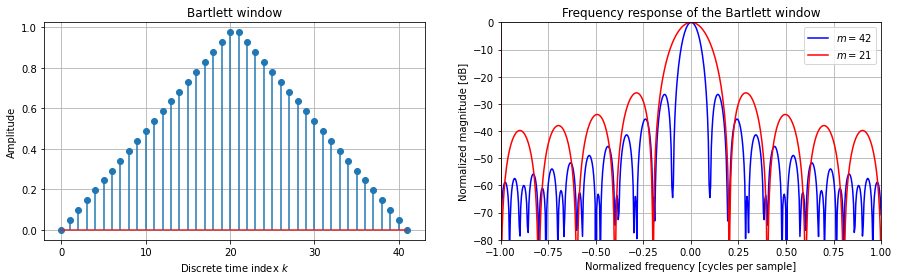

In [7]:
#Create the window
bartlett_w1 = sig.windows.bartlett(order)           #define the Bartlett window for order m = 42

#Visualise the window
plt.figure(figsize=(15,4))                          #set the size of the figure

#Time-domain graph of Bartlett window for m = 42
plt.subplot(1,2,1)                                  #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(bartlett_w1, use_line_collection=True)     #plot discrete (sampled) time-domain graph for order m = 42
plt.ylabel("Amplitude")                             #put name of y label
plt.xlabel("Discrete time index $k$")               #put name of x label
plt.title("Bartlett window")                        #put title of the figure
plt.grid()                                          #configure the grid lines

#Frequency response of Bartlett window for m = 42
plt.subplot(1,2,2)                                  #2nd plot of the 2 plots. (It's gonna be visualised on the right)
A = fft(bartlett_w1, 512) / (len(bartlett_w1)/2.0)  #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))               #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))              #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0) #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'b', label="$m=42$")         #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                       #set x and y axis
 
plt.ylabel("Normalized magnitude [dB]")               #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")#put name of x label
plt.title("Frequency response of the Bartlett window")#put title of the figure

#Frequency response of Bartlett window for m = 21
bartlett_w2 = sig.windows.bartlett(21)              #define the Bartlett window for order m = 21
A = fft(bartlett_w2, 512) / (len(bartlett_w2)/2.0)  #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))               #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))              #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0) #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'red', label="$m=21$")       #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                       #set x and y axis

plt.grid()                                          #configure the grid lines
plt.legend()                                        #describe elements of the graph


The figure on the left shows the time-amplitude graph of the <code>Bartlett</code> window. Looking at the ([1.8](#mjx-eqn-bartlett)), the condition 'odd' must be satisfied for $m = 42$. Plus, looking at the ([1.9](#mjx-eqn-bartlett))  the condition 'even' must be satisfied for $m = 21$. At the beginning of the code part, there are time-domain and frequency-domain of the window function for $m = 42$. So, ([1.9](#mjx-eqn-bartlett)) must be taken into account. The amplitude of the first 21 discrete time index $k$ is symmetric to the last 21 discrete time index $k$. In order to prove that you can add <code>bartlett_w1</code> at the end of the code part and the amplitude of discrete time index $k$ for $m = 42$ can be seen. 

| **$k$** 	| **Symmetric $k$** 	|  **Result** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[41]$           	| $0$          	|
| $k[1]$   	| $k[40]$           	| $0.048$      	|
| $k[2]$   	| $k[39]$           	| $0.097$      	|
| $k[3]$   	| $k[38]$           	| $0.146$       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[20]$  	| $k[21]$           	| $0.976$      	|


If you add <code>bartlett_w2</code> at the end of the code part, the amplitude at discrete time index $k$ for $m = 21$ can be seen in the array form. Its values are:


| **$k$** 	| **Symmetric $k$** 	|  **Result** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[20]$           	| $0$          	|
| $k[1]$   	| $k[19]$           	| $0.1$      	    |
| $k[2]$   	| $k[18]$           	| $0.2$      	    |
| $k[3]$   	| $k[17]$           	| $0.3$       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[10]$  	|  $-$         	    | $1$      	    |


The figure on the right depicts the graph of the fourier transform of the <code>Bartlett</code> window. First side lobe is more or less $27$ $dB$ down from main side lobe for $m = 42$. 


## General Comparison among windows

<div class="alert alert-block alert-warning">
    
<ol>
  <li> As it can be seen from the frequency-domain graphs of relevant window function, main lobe of order $m = 21$ is twice as big as the main lobe of order $m = 42$. Mathematically, $ 2\pi/21 = 2\times2\pi/42 $ verifies the graph. It means that if the order $m$ decreases main lobe gets larger.
  </li>
  <br>
  <li> The height of first side lobe between the order $m = 42$ and $m = 21$ from $ 0 $ $dB$ is almost same.
 </li>
  <br>
  <li> It's observed that the highest side lobe(lowest attenuation) among those frequency-domains is the <code>rectangular</code> window and it also has minimum band pass.</li>
  <br>
  <li> The lowest side lobe(highest attenuation) among those frequency-domains is the <code>blackman</code> window.</li>
  <br>
  <li> Side lobes have faster decay in the <code>blackman</code> and  <code>hann</code> windows' frequency domains.
  </li>
  <br>
  <li> The structure of the the responses looks like each other.</li>
  <br>
  <li> Dynamic range is restricted by side lobes.</li>
  <br>
  <li> Windowing functions have the property of symmetry from the midpoint of the filter order. Therefore, we can say that there is linear phase.</li>
    
</ol> 

</div>

    



Explanations, mathematical expressions and code part for Task 1.a are completed. Let's jump into the next task. Another window function, <code>Kaiser</code> window, will be explained.  

<div class="alert alert-block alert-info">
    <strong><h3> Task 1.b  </h3></strong> <br>
     Plot <code>kaiser</code> windows and its fourier transform for $m=21$ and $\beta = 0,3,6$
</div>


#### Kaiser Window in Time and Frequency Domain

There is an important difference between the <code>Kaiser</code> window and other windows. This is the $\beta$ coefficient.

Window function is as follows:


\begin{equation}\label{kaiser} \tag{1.10} %Kaiser window
w^\mathrm{K}[k] = \frac{I_0\bigg ( \beta  \sqrt{1-(1-\frac{2}{m}k)^2}\bigg )}{I_0(\beta )}
\cdot w^\mathrm{R}[k]
\end{equation}


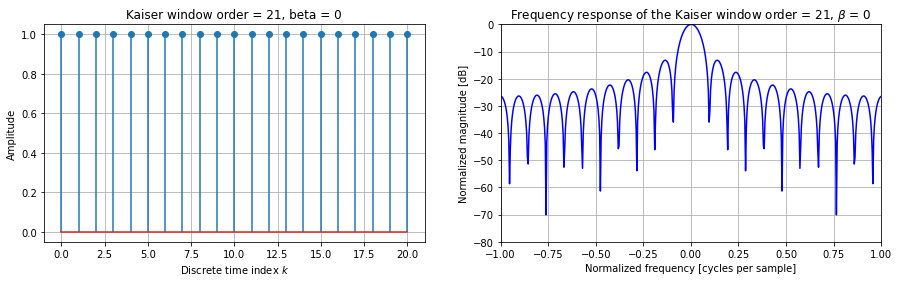

In [8]:
#Create the window
kaiser_w1 = sig.windows.kaiser(21, beta = 0)               #define the Kaiser window for order m = 21, beta = 0

#Visualise the window
plt.figure(figsize=(15,4))                              #set the size of the figure     

#Time-domain graph of Kaiser window for m = 21, beta = 0
plt.subplot(1,2,1)                                      #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(kaiser_w1, use_line_collection=True)              #plot discrete (sampled) time-domain graph for order m = 42
plt.ylabel("Amplitude")                                 #put name of y label
plt.xlabel("Discrete time index $k$")                   #put name of x label
plt.title("Kaiser window order = 21, beta = 0")         #put title of the figure
plt.grid()                                              #configure the grid lines

#Frequency response of Kaiser window for m = 21, beta = 0
plt.subplot(1,2,2)                                      #2nd plot of the 2 plots. (It's gonna be visualised on the right)
A = fft(kaiser_w1, 512) / (len(kaiser_w1)/2.0)                #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                   #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                  #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0)     #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'b')                           #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                           #set x and y axis

plt.ylabel("Normalized magnitude [dB]")                                        #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")                         #put name of x label
plt.title(r"Frequency response of the Kaiser window order = 21, $\beta$ = 0 ") #put title of the figure

plt.grid()                                          #configure the grid lines


Left figure shows the time-domain of <code>Kaiser</code> window for order $m = 21$ and $\beta = 0$. The result is same with the <code>rectangular</code> window since the coefficient $\beta$ is equal to $0$. The figure on the right depicts the frequency response of the <code>Kaiser</code> window for order m = 21 and $\beta = 0$. Likewise, the result is the same with <code>rectangular</code> window. You can see the normalised magnitude of both <code>rectangular</code> and <code>kaiser</code> window with $\beta = 0$  for $m = 21$ in the table below.

| **Response array** |**Magnitude (dB) of rectangular window for $m = 21$** |**Magnitude (dB) of the kaiser window  for $m = 21$, $\beta=0$**|
|:---------------------------:	|:---------------------------------------------------:	|:--------------------------------------------------------------:	|
| $response[0] = response[511]$ 	|                        $-26.44$                       	|                             $-26.44$                             	|
| $response[1] = response[510]$ 	|                        $-26.51$                       	|                             $-26.51$                             	|
| $response[2] = response[509]$ 	|                        $-26.73$                       	|                             $-26.73$                             	|
| $response[3] = response[508]$ 	|                        $-27.10$                       	|                             $-27.10$                             	|
|           $\vdots$          	|                       $\vdots$                      	|                            $\vdots$                            	|
|        $response[256]$        	|                          $0$                          	|                                $0$                               	|


So, the result shows that frequency responses are same. You can also try putting the array, <code>response[x]</code>, (x is a integer value) at the end of code parts in order to prove equality between two arrays. 
 


 The effect of $\beta$ can be observed in the respective codes. Time-domain and frequency-domain will be changed accordingly.


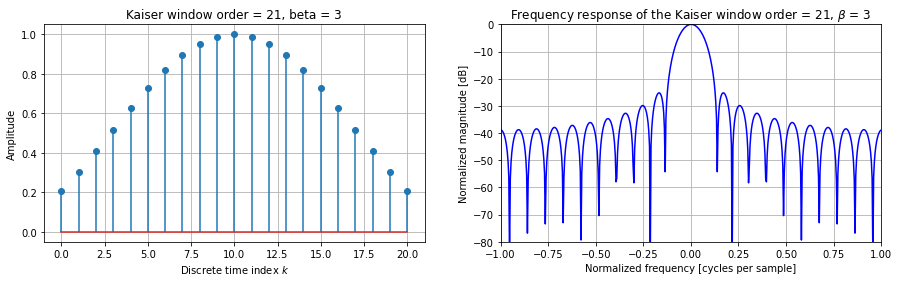

In [9]:
#Create the window
kaiser_w2 = sig.windows.kaiser(21, beta = 3)            #define the Kaiser window for order m = 21, beta = 3

#Visualise the window
plt.figure(figsize=(15,4))                              #set the size of the figure

#Time-domain graph of Kaiser window for m = 21, beta = 3
plt.subplot(1,2,1)                                      #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(kaiser_w2, use_line_collection=True)           #plot discrete (sampled) time-domain graph for order m = 21
plt.ylabel("Amplitude")                                 #put name of y label
plt.xlabel("Discrete time index $k$")                   #put name of x label
plt.title("Kaiser window order = 21, beta = 3")         #put title of the figure
plt.grid()                                              #configure the grid lines

#Frequency response of Kaiser window for m = 21, beta = 3
plt.subplot(1,2,2)                                      #2nd plot of the 2 plots. (It's gonna be visualised on the right)
A = fft(kaiser_w2, 512) / (len(kaiser_w2)/2.0)                #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                   #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                  #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0)     #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'b')                           #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                           #set x and y axis

plt.ylabel("Normalized magnitude [dB]")                                        #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")                         #put name of x label
plt.title(r"Frequency response of the Kaiser window order = 21, $\beta$ = 3 ") #put title of the figure

plt.grid()                                              #configure the grid lines


As you can see from the time-domain figure on the left, the graph starts to bend. Only the coefficient $\beta$ is changed to value $3$. Let's see the values of time-domain and frequency-domain.

Amplitude values at the <code>Kaiser</code> window for $m = 21$ and $\beta = 3$ is shown as:


| **$k$** 	| **Symmetric $k$** 	|  **Result** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[20]$           	| $0.205$          	|
| $k[1]$   	| $k[19]$           	| $0.302$      	    |
| $k[2]$   	| $k[18]$           	| $0.408$      	    |
| $k[3]$   	| $k[17]$           	| $0.517$       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[10]$  	|   $-$         	    | $1$      	    |

The figure on the right depicts the frequency response of the Kaiser window for order $m = 21$ and $\beta = 3$. The difference from the former figure are the width of the main lobe and side lobe attenuation. 

Normalised magnitude of the <code>Kaiser</code> window for order $m = 21$ and $\beta = 3$ is shown as:

|         **Response array**    | **Magnitude (dB) of the kaiser window  for $m = 21$, $\beta=3$** 	|
|:---------------------------:	|:--------------------------------------------------------------:	|
| $response[1]$ = $response[511]$ 	|                             $-38.91$                            	|
| $response[2]$ = $response[510]$ 	|                             $-39.13$                             	|
| $response[3]$ = $response[509]$ 	|                             $-39.52$                             	|
| $response[4]$ = $response[508]$ 	|                             $-40.07$                             	|
|           $\vdots$          	|                            $\vdots$                            	|
|        $response[256]$        	|                             $-0.01$                               	|

Let's put the $\beta = 6$ and see the effect of it. 

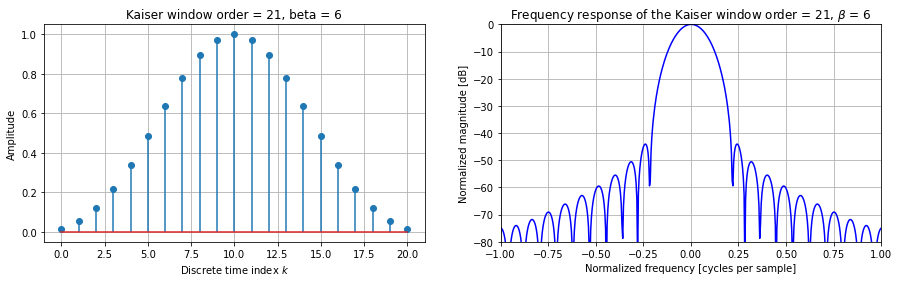

In [10]:
#Create the window
kaiser_w3 = sig.windows.kaiser(21, beta = 6)            #define the Kaiser window for order m = 21, beta = 6

#Visualise the window
plt.figure(figsize=(15,4))                              #set the size of the figure

#Time-domain graph of Kaiser window for m = 21, beta = 6
plt.subplot(1,2,1)                                      #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.stem(kaiser_w3, use_line_collection=True)           #plot discrete (sampled) time-domain graph for order m = 21
plt.ylabel("Amplitude")                                 #put name of y label
plt.xlabel("Discrete time index $k$")                   #put name of x label
plt.title("Kaiser window order = 21, beta = 6")         #put title of the figure
plt.grid()                                              #configure the grid lines
 
#Frequency response of Kaiser window for m = 21, beta = 6
plt.subplot(1,2,2)                                      #2nd plot of the 2 plots. (It's gonna be visualised on the right)
A = fft(kaiser_w3, 512) / (len(kaiser_w3)/2.0)          #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                   #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                  #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0)     #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'b')                           #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                           #set x and y axis

plt.ylabel("Normalized magnitude [dB]")                                        #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")                         #put name of x label
plt.title(r"Frequency response of the Kaiser window order = 21, $\beta$ = 6 ") #put title of the figure
plt.grid()                                              #configure the grid lines


Figure on the left visualises time-amplitude graph of <code>Kaiser</code> window for order $m = 21$ and the coefficient $\beta = 6$. The bend is greater compared to the previous figure which has the coefficient $\beta = 3$. It is important to observe the amplitude values of time-domain so as to see the effect of $\beta$.

When you put <code>kaiser_w3</code> at the end of the code part you can observe amplitude array. Let's see that on the table below.

| **$k$** 	| **Symmetric $k$** 	|  **Result** 	|
|:--------:	|:-----------------:|:------------:	|
| $k[0]$   	| $k[20]$           	| $0.015$          	|
| $k[1]$   	| $k[19]$           	| $0.053$      	    |
| $k[2]$   	| $k[18]$           	| $0.119$      	    |
| $k[3]$   	| $k[17]$           	| $0.215$       	|
| $\vdots$  |$\vdots$           | $\vdots$     	|
| $k[10]$  	|   $-$         	    | $1$      	    |

Since values above are symmetric, they are equal to each other. As you can see in the table above, the ends approached zero. The width of the main lobe is greater than previous <code>kaiser</code> windows ($\beta = 0$, $\beta = 3$ ). First attenuation is also greater than previous <code>kaiser</code> windows. Let's see the normalised magnitude values. 

|         **Response array**    | **Magnitude (dB) of the kaiser window  for $m = 21$, $\beta=6$** 	|
|:---------------------------:	|:--------------------------------------------------------------:	|
| $response[1]$ = $response[511]$ 	|                             $-75.02$                            	|
| $response[2]$ = $response[510]$ 	|                             $-75.33$                             	|
| $response[3]$ = $response[509]$ 	|                             $-75.87$                             	|
| $response[4]$ = $response[508]$ 	|                             $-76.67$                             	|
|           $\vdots$          	|                            $\vdots$                            	|
| $response[255]$ = $response[257]$ |                             $-0.009$                             	|
|        $response[256]$        	|                                $0$                             	|




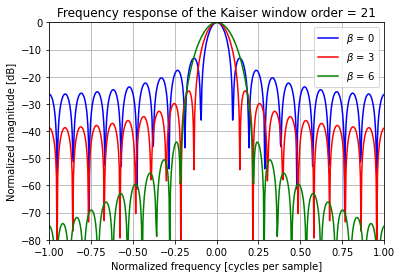

In [11]:
#Frequency response of Kaiser window for m = 21, beta = 0
kaiser_w1 = sig.windows.kaiser(21, beta = 0)             #define the Kaiser window for order m = 21, beta = 0

A = fft(kaiser_w1, 512) / (len(kaiser_w1)/2.0)           #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                    #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                   #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0)      #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'b', label=r'$\beta$ = 0')      #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                            #set x and y axis

plt.ylabel("Normalized magnitude [dB]")                         #put name of y label
plt.xlabel("Normalized frequency [cycles per sample]")          #put name of x label
plt.title("Frequency response of the Kaiser window order = 21") #put title of the figure

#Frequency response of Kaiser window for m = 21, beta = 3
kaiser_w2 = sig.windows.kaiser(21, beta = 3)             #define the Kaiser window for order m = 21, beta = 3

A = fft(kaiser_w2, 512) / (len(kaiser_w2)/2.0)           #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                    #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                   #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0)      #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'r', label=r'$\beta$ = 3')      #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                            #set x and y axis

#Frequency response of Kaiser window for m = 21, beta = 6
kaiser_w3 = sig.windows.kaiser(21, beta = 6)                #define the Kaiser window for order m = 21, beta = 6
 
A = fft(kaiser_w3, 512) / (len(kaiser_w3)/2.0)           #FFT of the time-domain
freq = np.linspace(-1.0, 1.0, len(A))                    #frequency is normalised to [-1.0,1.0] in a continuous form
x = np.abs(fftshift(A / abs(A).max()))                   #shift the zero-frequency component to the center of the spectrum
response = 20 * np.log10(x, out = x, where = x > 0)      #magnitude is calculated.(Zero collision error is avoided)
plt.plot(freq, response, 'g', label=r'$\beta$ = 6')      #plot frequency response
plt.axis([-1.0, 1.0, -80, 0])                            #set x and y axis

plt.grid()                                               #configure the grid lines
plt.legend()                                             #describe elements of the graph


## General Comparison among Kaiser windows

<div class="alert alert-block alert-warning">
    
<ol>
   <li> As the $\beta$ coefficient increases at fixed order, the windowing function bends at the edges and takes the shape of a bell.
   </li>
   <br>
  <li> When $\beta$ coefficient increases at fixed order main lobes gets larger so that they are directly connected. 
  </li>
   <br>
  <li> $\beta = 6$ has the highest side lobe attenuation and fastest decay while $\beta = 0$ has the lowest side lobe attenuation.
  </li>
   <br>
   <li><code>Kaiser</code> window with  $\beta = 0$ has a same shape with <code>rectangular</code> window
   </li>
   <br>
  <li> It's observed that the highest side lobe (lowest attenuation) among those frequency-domains is the $\beta = 0$ and it also has minimum band pass like the <code>rectangular</code> window.</li>
</ol> 

</div>


## References

1) https://docs.scipy.org/doc/scipy/reference/signal.html

2) https://docs.google.com/presentation/d/1sG8qePZAKcNdargJi6gNqRfVRl0ZEtxMLxA-iI5u6pg/edit#slide=id.g2702b4d04_031

3) http://www.dspguide.com/ch10/6.htm